In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letra

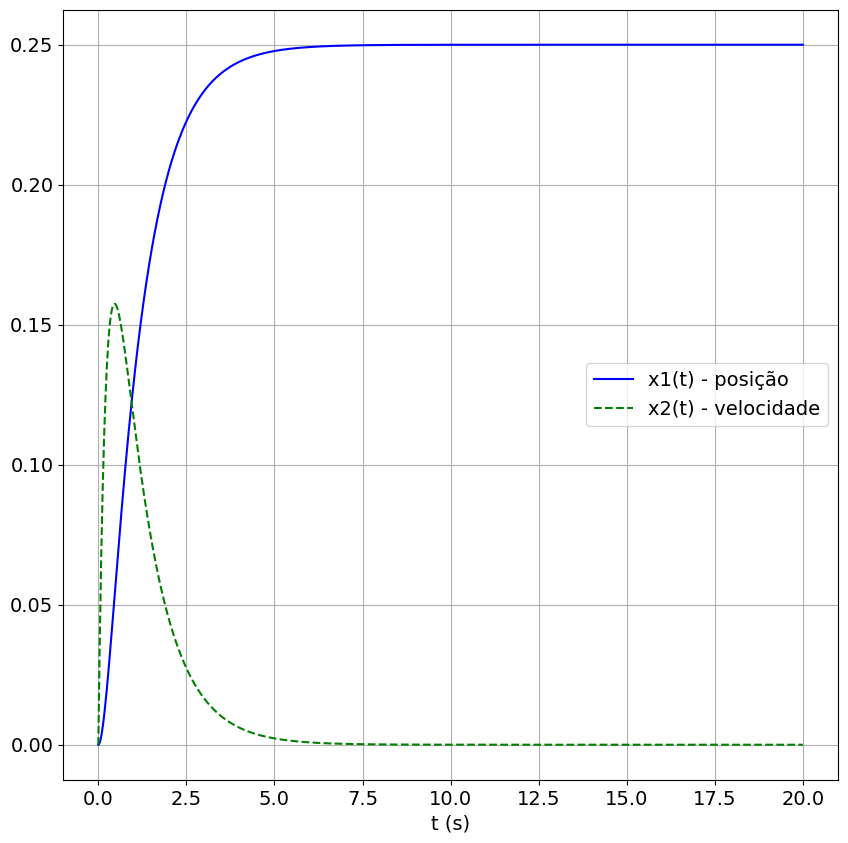

In [ ]:
# definir uma função para o sistema mecânico (sistema massa-mola-amortecedor)
def mecanico(y, t, m, b, k, u):
    # substituição de variáveis
    # x1 -> posição
    # x2 -> velocidade
    x1, x2 = y
    # sistema de ODEs de primeira ordem
    # x1' = y'  = x2
    # x2' = y'' = - (b/m) x2 - (k/m) x1 + u/m
    dydt = [x2, -(b/m)*x2 - (k/m)*x1 + (u/m)]
    return dydt


# parâmetros
m = 1 # massa
b = 5 # coef. amortecimento
k = 4 # coef. elasticidade
u = 1 # força ext. - degrau unitário / obs: no slide 6 da videoaula 4 u(t) = f(t)

t = np.linspace(0, 20, 1001) # integrar de t = 0 a t = 20
y0 = [0.0, 0.0]              # cond. iniciais

# integrar sistema de ODEs via odeint - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
sol = odeint(mecanico, y0, t, args=(m, b, k, u))

# plot
plt.plot(t, sol[:, 0], 'b-', label='x1(t) - posição')
plt.plot(t, sol[:, 1], 'g--', label='x2(t) - velocidade')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.grid()
plt.show()